In [1]:
import pandas as pd

# Replace 'your_dataset.csv' with the actual file path
df = pd.read_csv('C:/Users/allep/Downloads/dataset2-SalesTransactions2/Sales Transaction v.4a.csv')

# Display the first few rows of the dataset
df.head()


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [2]:
# Check the data types of each column
print(df.dtypes)
print(df.isnull().sum())

TransactionNo     object
Date              object
ProductNo         object
ProductName       object
Price            float64
Quantity           int64
CustomerNo       float64
Country           object
dtype: object
TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64


In [3]:
df.describe()

,Price,Quantity,CustomerNo
count,536350.000000,536350.000000,536295.000000
mean,12.662182,9.919347,15227.893178
std,8.490450,216.662300,1716.582932
min,5.130000,-80995.000000,12004.000000
25%,10.990000,1.000000,13807.000000
50%,11.940000,3.000000,15152.000000
75%,14.090000,10.000000,16729.000000
max,660.620000,80995.000000,18287.000000


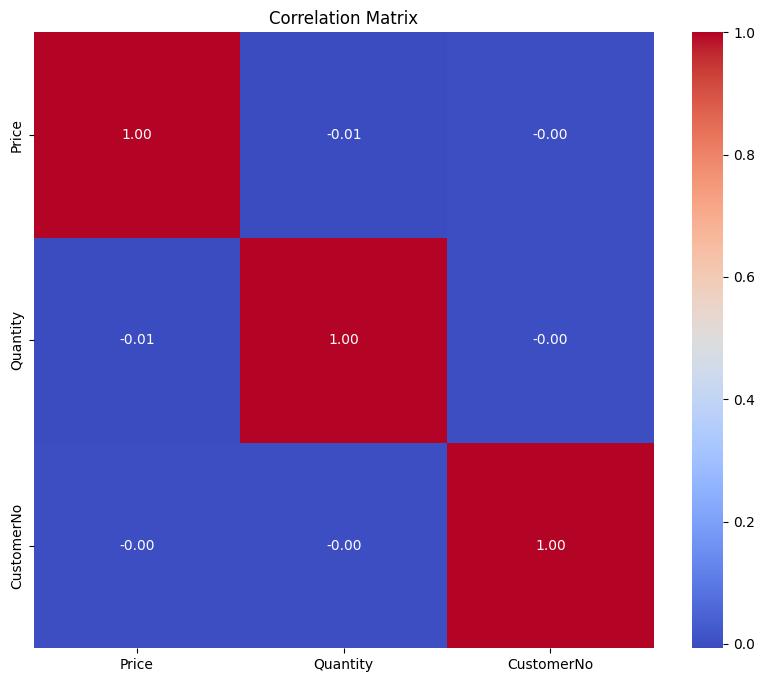

In [4]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix on the numeric columns
corr = numeric_df.corr()

# Create a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

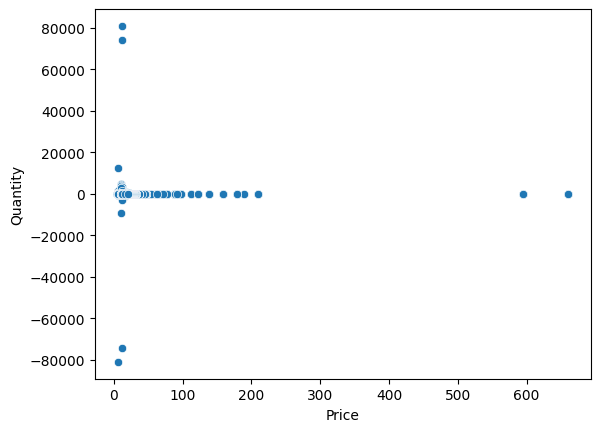

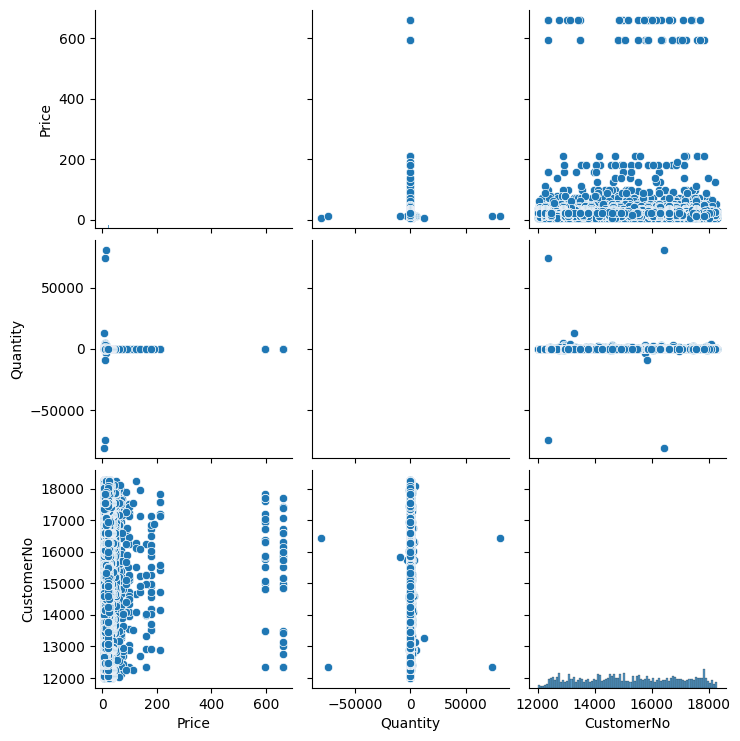

In [5]:
# Scatter plot of a feature vs the target variable
sns.scatterplot(x='Price', y='Quantity', data=df)
plt.show()

# Pairplot to see relationships between multiple features
sns.pairplot(df)

In [6]:
print("DataFrame shape:", df.shape)


DataFrame shape: (536350, 8)


In [7]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: C:\Users\allep\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
from sklearn.model_selection import train_test_split

# Assuming 'Price' is the feature and 'Quantity' is the target (you can change them accordingly)
X = df[['Price']]  # Feature matrix (you can include more features here)
y = df['Quantity']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets to confirm the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (429080, 1)
X_test shape: (107270, 1)
y_train shape: (429080,)
y_test shape: (107270,)


In [9]:
from sklearn.model_selection import train_test_split

# Assuming 'Price' is the feature and 'Quantity' is the target (you can change them accordingly)
X = df[['Price']]  # Feature matrix (you can include more features here)
y = df['Quantity']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

# Create and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Calculate MAPE (Mean Absolute Percentage Error)
mape_linear = mean_absolute_percentage_error(y_test, y_pred_linear)
print(f"Linear Regression MAPE: {mape_linear}")

Linear Regression MAPE: 3.5301721041922662


In [11]:
from sklearn.linear_model import Ridge

# Create and train the Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha value for regularization strength
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test)

# Calculate MAPE
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)
print(f"Ridge Regression MAPE: {mape_ridge}")

Ridge Regression MAPE: 3.530172105784013


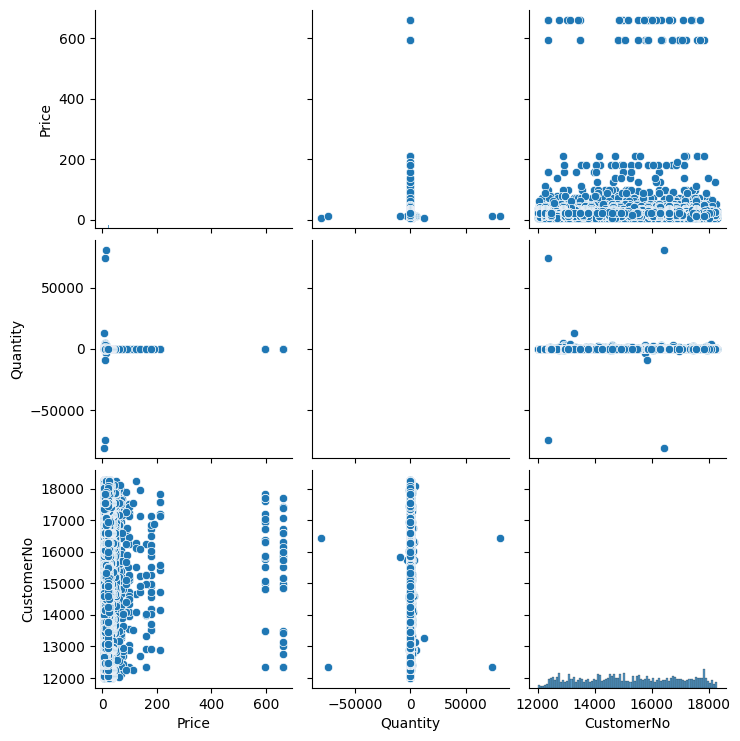

In [12]:
sns.pairplot(df)
plt.show()

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Create a Random Forest Regressor model
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
forest_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_forest = forest_reg.predict(X_test)

# Calculate the MAPE (Mean Absolute Percentage Error)
forest_mape = mean_absolute_percentage_error(y_test, y_pred_forest)

# Print the MAPE for the Random Forest model
print(f"MAPE for Random Forest: {forest_mape}")


MAPE for Random Forest: 2.250716927355079


                                Date          Price       Quantity  \
count                         536350  536350.000000  536350.000000   
mean   2019-07-04 02:52:31.891116032      12.662182       9.919347   
min              2018-12-01 00:00:00       5.130000  -80995.000000   
25%              2019-03-28 00:00:00      10.990000       1.000000   
50%              2019-07-20 00:00:00      11.940000       3.000000   
75%              2019-10-19 00:00:00      14.090000      10.000000   
max              2019-12-09 00:00:00     660.620000   80995.000000   
std                              NaN       8.490450     216.662300   

          CustomerNo  
count  536295.000000  
mean    15227.893178  
min     12004.000000  
25%     13807.000000  
50%     15152.000000  
75%     16729.000000  
max     18287.000000  
std      1716.582932  


C:\Users\allep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


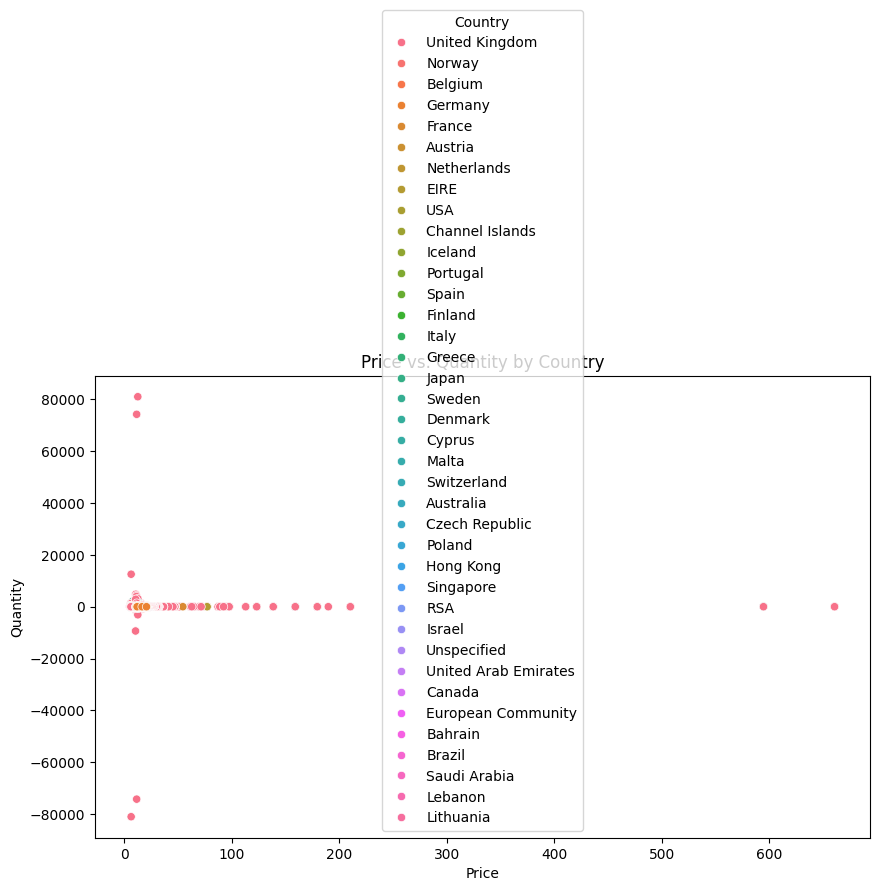

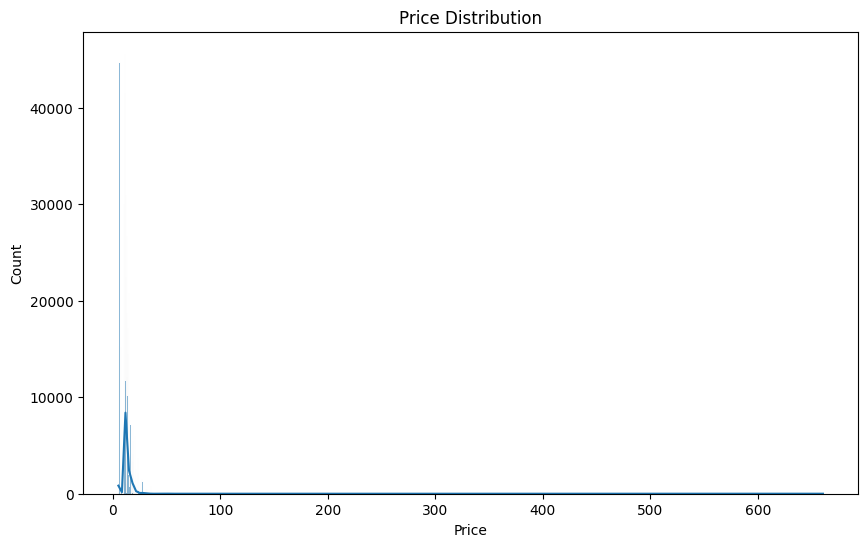

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data (replace 'your_data.csv' with the actual file name)
df = pd.read_csv('C:/Users/allep/Downloads/dataset2-SalesTransactions2/Sales Transaction v.4a.csv')

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Summary statistics
print(df.describe())

# Visualize Price vs. Quantity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='Quantity', hue='Country')
plt.title('Price vs. Quantity by Country')
plt.show()

# Visualize Distribution of Price
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Price Distribution')
plt.show()